<a href="https://colab.research.google.com/github/Mradul9756/Book-Recommendation-Using-NLP/blob/main/T4LinkedIn_postAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import seaborn as sns
from itertools import accumulate
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import math
from matplotlib.dates import drange
from matplotlib.dates import date2num

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
df_followers = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/Followers_all.csv")

In [91]:
df_post = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/All_Posts.csv")
#df_post.head(10) # checking if the data has loaded correctly

In [33]:
df_followers.head(3)

,Date,Sponsored followers,Organic followers,Total followers
0,03/07/2022,0,1,1
1,03/08/2022,0,4,4
2,03/09/2022,0,1,1


In [34]:
df_post.head(3) # to see if data has loaded correctly

,Post title,Post link,Post type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Follows,Engagement rate,Content Type
0,We know firsthand that signatory management fo...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Nathan Brown,1/19/23,NaN,NaN,All followers,2297,1296.0,51,0.022203,52,0,3,NaN,0.045276,Video
1,We are honored to announce that Treasury4 was ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,1/10/23,NaN,NaN,All followers,2981,NaN,48,0.016102,101,12,7,NaN,0.055686,NaN
2,We are thrilled to announce that Treasury4 cus...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Nathan Brown,12/22/22,NaN,NaN,All followers,1238,NaN,38,0.030695,50,0,6,NaN,0.074313,NaN


In [36]:
df_post[['Impressions','Views','Clicks','Likes','Comments','Reposts']].describe() # stats for posts

,Impressions,Views,Clicks,Likes,Comments,Reposts
count,40.000000,12.000000,40.000000,40.000000,40.000000,40.000000
mean,2233.200000,636.666667,57.575000,47.900000,2.950000,2.825000
std,3499.411784,578.199609,66.876038,31.451876,4.150687,3.104071
min,128.000000,64.000000,2.000000,0.000000,0.000000,0.000000
25%,1120.000000,74.500000,22.750000,32.500000,0.000000,0.000000
50%,1377.500000,529.500000,43.000000,43.000000,1.500000,2.000000
75%,1888.000000,1170.000000,74.250000,56.250000,4.000000,4.000000
max,17412.000000,1486.000000,407.000000,150.000000,19.000000,13.000000


In [37]:
df_post.columns

Index(['Post title', 'Post link', 'Post type', 'Campaign name', 'Posted by',
       'Created date', 'Campaign start date', 'Campaign end date', 'Audience',
       'Impressions', 'Views', 'Clicks', 'Click through rate (CTR)', 'Likes',
       'Comments', 'Reposts', 'Follows', 'Engagement rate', 'Content Type'],
      dtype='object')

In [38]:
df_post['Content Type'].value_counts() # too see the kind of posts

Video      6
Article    6
Name: Content Type, dtype: int64

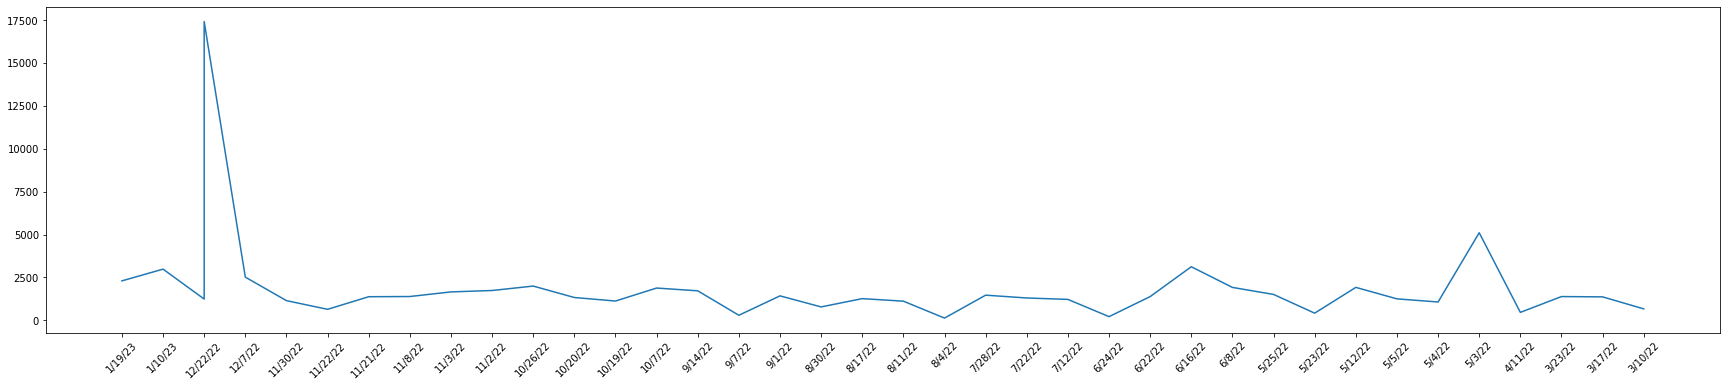

In [39]:
fig, ax = plt.subplots(figsize=(30,6))
x = df_post['Created date']
y = df_post[[ 'Impressions']]
plt.plot(x,y)
#plt.gca().legend(( 'Views'))
plt.xticks(rotation=45)
plt.show()

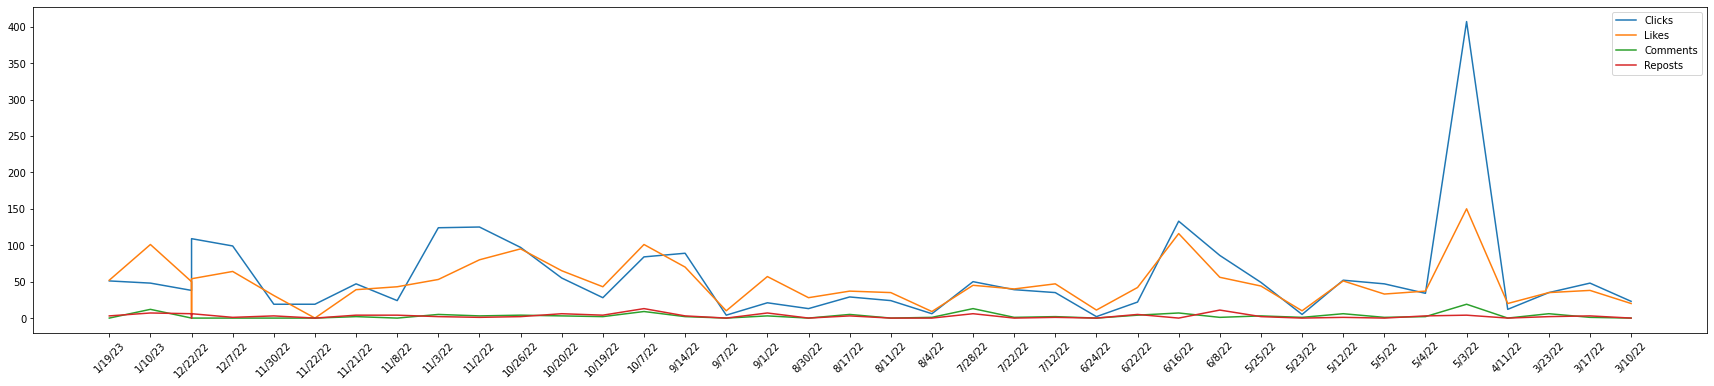

In [40]:
fig, ax = plt.subplots(figsize=(30,6))
x = df_post['Created date']
df_post['Created date'] = pd.to_datetime(df_post['Created date'])
y = df_post[['Clicks','Likes','Comments', 'Reposts']]
plt.plot(x,y)
plt.gca().legend(('Clicks','Likes','Comments', 'Reposts'))
plt.xticks(rotation=45)
plt.show()

# Article vs. Video

In [41]:
df_type = df_post.dropna(subset=['Content Type']) # drop nulls from content type for hist plots

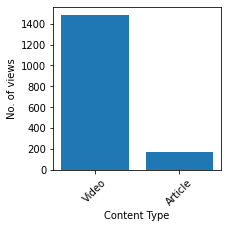

In [42]:
#fig, ax = plt.subplots(figsize=(30,6))
fig, ax = plt.subplots(figsize=(3,3))
x = df_type['Content Type']
y = df_type['Views']
plt.xlabel('Content Type')
plt.ylabel('No. of views')
plt.xticks(rotation=45)
plt.bar(x,y)
plt.show()

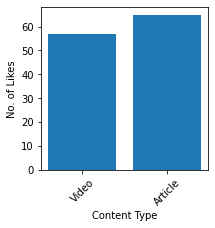

In [43]:
#fig, ax = plt.subplots(figsize=(1,1))
fig, ax = plt.subplots(figsize=(3,3))
x = df_type['Content Type']
y = df_type['Likes']
plt.xlabel('Content Type')
plt.ylabel('No. of Likes')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

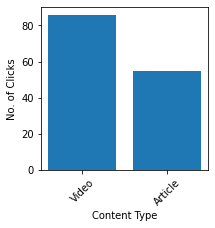

In [44]:
fig, ax = plt.subplots(figsize=(3,3))
x = df_type['Content Type']
y = df_type['Clicks']
plt.xlabel('Content Type')
plt.ylabel('No. of Clicks')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

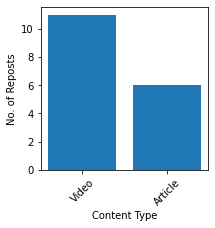

In [46]:
fig, ax = plt.subplots(figsize=(3,3))
x = df_type['Content Type']
y = df_type['Reposts']
plt.xlabel('Content Type')
plt.ylabel('No. of Reposts')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

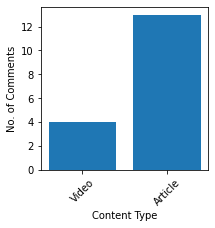

In [47]:
fig, ax = plt.subplots(figsize=(3,3))
x = df_type['Content Type']
y = df_type['Comments']
plt.xlabel('Content Type')
plt.ylabel('No. of Comments')
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

**Results: Articles generate more comments and slightly more likes than video but overall videos generate more views (huge difference), shares, clicks
However,
Videos create more engagement**

In [48]:
# function for creating a cumulative followers out of daily increment in followers
def cumulative_sum(lst):
  summ = [lst[0]] * len(lst)
  for i in range(1,len(lst)):
    summ[i] = summ[i-1] + lst[i]
  return summ

In [49]:
follow_cum = cumulative_sum(df_followers['Total followers']) # add cumulative followers to the dataframe
df_followers['Cumulative followers'] = follow_cum
df_followers.describe()

,Sponsored followers,Organic followers,Total followers,Cumulative followers
count,364.0,364.000000,364.000000,364.000000
mean,0.0,5.365385,5.365385,942.925824
std,0.0,6.143016,6.143016,607.165494
min,0.0,-1.000000,-1.000000,1.000000
25%,0.0,2.000000,2.000000,421.250000
50%,0.0,4.000000,4.000000,1023.500000
75%,0.0,7.000000,7.000000,1480.750000
max,0.0,52.000000,52.000000,1953.000000


In [50]:
df_followers[['Date','Cumulative followers']].tail(10)

,Date,Cumulative followers
354,02/24/2023,1894
355,02/25/2023,1903
356,02/26/2023,1909
357,02/27/2023,1913
358,02/28/2023,1921
359,03/01/2023,1926
360,03/02/2023,1931
361,03/03/2023,1947
362,03/04/2023,1952
363,03/05/2023,1953


In [51]:
df_followers[['Date','Cumulative followers', 'Total followers']].tail(20)
#np.where(df_followers['Date']=='11/02/2022')
filter = df_followers['Date']=="11/02/2022"
df_followers[['Date']]

,Date
0,03/07/2022
1,03/08/2022
2,03/09/2022
3,03/10/2022
4,03/11/2022
...,...
359,03/01/2023
360,03/02/2023
361,03/03/2023
362,03/04/2023


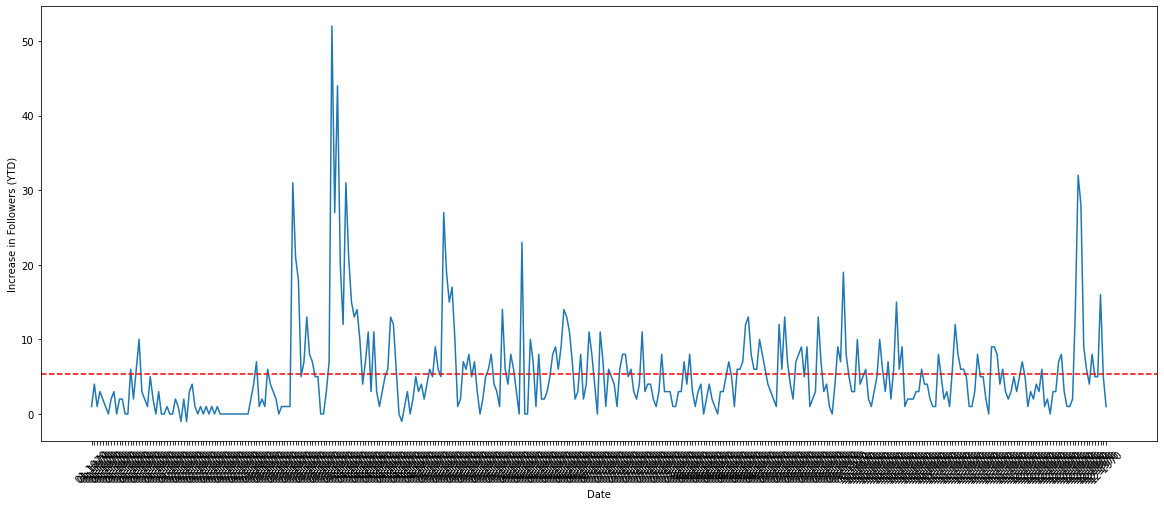

In [52]:
ffig, ax = plt.subplots(figsize=(20,8))
x = df_followers['Date']
y = df_followers['Total followers']
plt.plot(x,y)
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
plt.xlabel('Date')
plt.ylabel('Increase in Followers (YTD)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
#plt.gca().legend(('Cumulative followers','Total followers'))
plt.xticks(rotation=45)
plt.axhline(y=np.mean(df_followers['Total followers']), color='red', linestyle='--',label='Avg')
ymin, ymax = plt.ylim()
plt.show()

## correlation between total followers and posts

In [53]:
# create combined field
df_post_followers = df_followers.loc[df_followers['Date'].isin(df_post['Created date'])]
df_post_followers = df_post_followers[['Date','Total followers','Cumulative followers']]
df_post_followers.head()

,Date,Total followers,Cumulative followers
3,2022-03-10,3,9
10,2022-03-17,2,19
16,2022-03-23,6,35
35,2022-04-11,3,68
57,2022-05-03,2,79


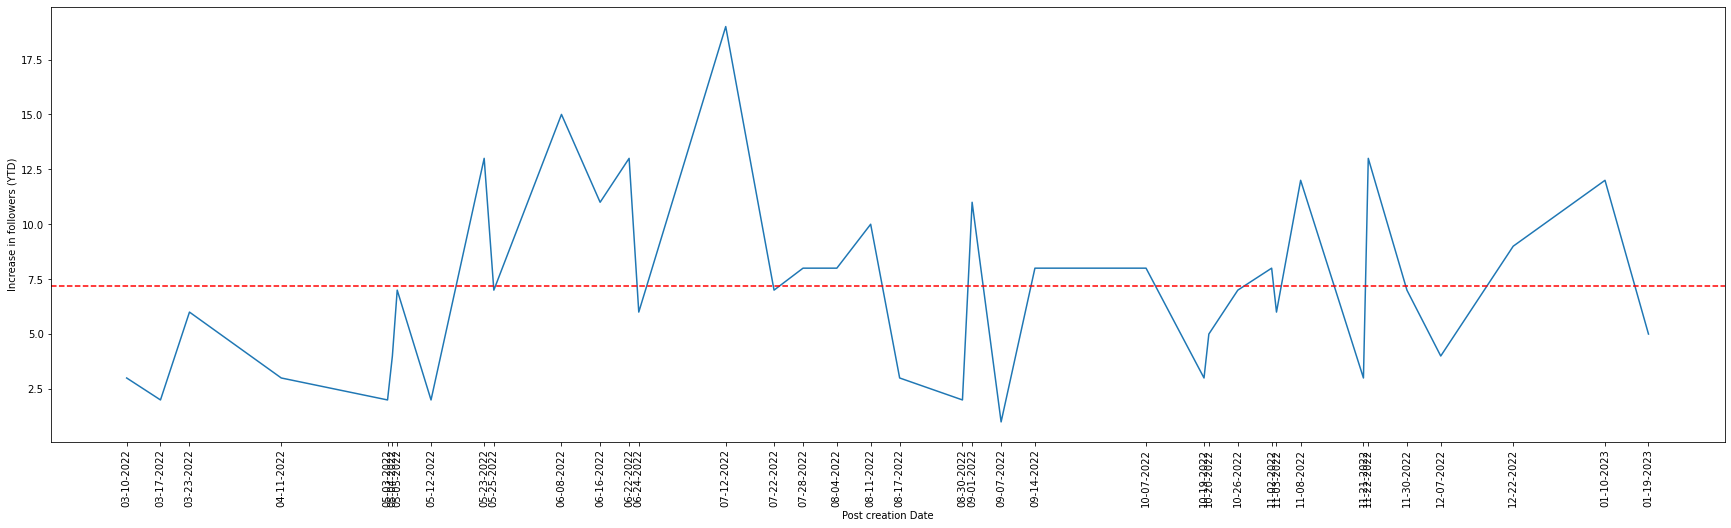

In [54]:
ffig, ax = plt.subplots(figsize=(30,8))

x = df_post_followers['Date']
y = df_post_followers[['Total followers']]
plt.plot(x,y)
#df_followers['Date'] = pd.to_datetime(df_followers['Date'])
plt.xlabel('Post creation Date')
plt.ylabel('Increase in followers (YTD)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
#plt.gca().legend(('Total followers'))
plt.axhline(y=np.mean(df_post_followers['Total followers']), color='red', linestyle='--',label='Avg')
plt.xticks(x)
plt.xticks(rotation=90)
plt.show()

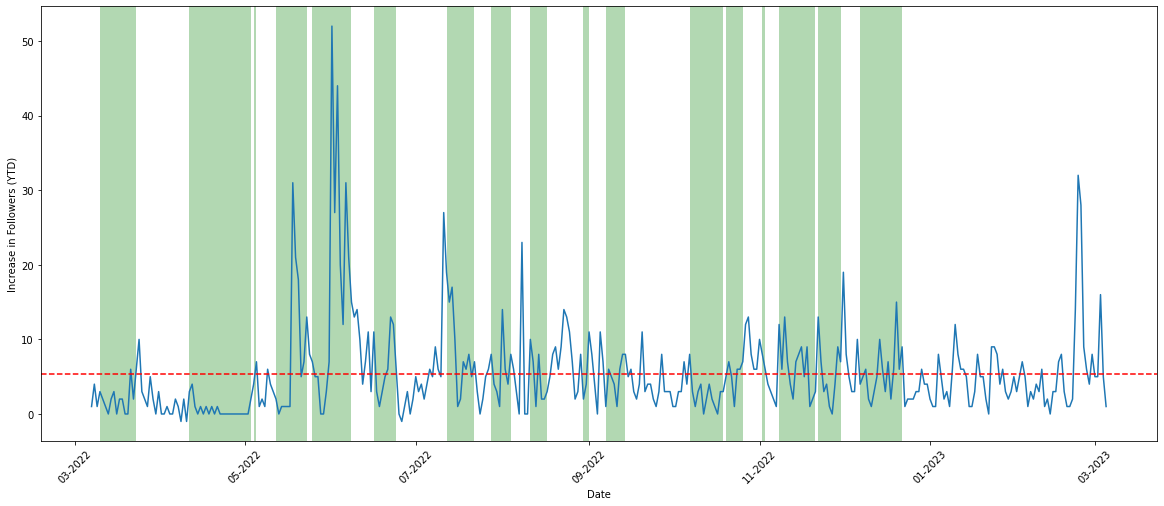

In [55]:
ffig, ax = plt.subplots(figsize=(20,8))
x = df_followers['Date']
y = df_followers['Total followers']
plt.plot(x,y)
z = df_post_followers['Date']
df_followers['Date'] = pd.to_datetime(df_followers['Date'])
plt.xlabel('Date')
plt.ylabel('Increase in Followers (YTD)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=45)
plt.axhline(y=np.mean(df_followers['Total followers']), color='red', linestyle='--',label='Avg') 
list1 = []
for i in range(0,len(df_post_followers)-1):
  list1.append(df_post_followers['Date'].iloc[i])
plt.axvspan(date2num(list1[0]), date2num(list1[2]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[3]), date2num(list1[4]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[5]), date2num(list1[6]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[7]), date2num(list1[8]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[9]), date2num(list1[10]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[11]), date2num(list1[13]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[14]), date2num(list1[15]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[16]), date2num(list1[17]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[18]), date2num(list1[19]),facecolor="green", alpha=0.3)
plt.axvspan(date2num(list1[20]), date2num(list1[21]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[22]), date2num(list1[23]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[24]), date2num(list1[25]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[26]), date2num(list1[27]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[28]), date2num(list1[29]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[30]), date2num(list1[31]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[32]), date2num(list1[33]),facecolor="green", alpha=0.3, label="Post 20th")
plt.axvspan(date2num(list1[34]), date2num(list1[35]),facecolor="green", alpha=0.3, label="Post 20th")
plt.show()

In [56]:
np.mean(df_post_followers['Total followers'])

7.184210526315789

In [57]:
np.mean(df_followers['Total followers'])

5.365384615384615

#### Conclusion - More increase in followers on post creation date

# Start of a more serious analysis

#### Install packages - might not all of them 

In [60]:
import emoji
from IPython.display import display
from pathlib import Path
import seaborn as sns
from scipy.stats import kruskal
from scipy.stats import mannwhitneyu
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import spacy
from tableone import TableOne

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [65]:
# check data types
for col in linkedin_posts_df.columns:
    col_type = type(linkedin_posts_df[col][0])
    print(col, ': ', col_type)

Post title :  <class 'str'>
Post link :  <class 'str'>
Post type :  <class 'str'>
Campaign name :  <class 'float'>
Posted by :  <class 'str'>
Created date :  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Campaign start date :  <class 'float'>
Campaign end date :  <class 'float'>
Audience :  <class 'str'>
Impressions :  <class 'numpy.int64'>
Views :  <class 'numpy.float64'>
Clicks :  <class 'numpy.int64'>
Click through rate (CTR) :  <class 'numpy.float64'>
Likes :  <class 'numpy.int64'>
Comments :  <class 'numpy.int64'>
Reposts :  <class 'numpy.int64'>
Follows :  <class 'numpy.float64'>
Engagement rate :  <class 'numpy.float64'>
Content Type :  <class 'str'>


In [92]:
linkedin_posts_df = df_post
linkedin_posts_df.head(10)

,Post title,Post link,Post type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Follows,Engagement rate,Content Type
0,We know firsthand that signatory management fo...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Nathan Brown,1/19/23,NaN,NaN,All followers,2297,1296.0,51,0.022203,52,0,3,NaN,0.045276,Video
1,We are honored to announce that Treasury4 was ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,1/10/23,NaN,NaN,All followers,2981,NaN,48,0.016102,101,12,7,NaN,0.055686,NaN
2,We are thrilled to announce that Treasury4 cus...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Nathan Brown,12/22/22,NaN,NaN,All followers,1238,NaN,38,0.030695,50,0,6,NaN,0.074313,NaN
3,We are thrilled to announce that Treasury4 cus...,https://www.linkedin.com/feed/update/urn:li:ac...,Sponsored,"Boost_Post_Website Visits_Dec 22, 2022, 19:06:51",Nathan Brown,12/22/22,12/22/22,1/4/23,All followers,16174,NaN,71,0.004390,4,0,0,0.0,0.004390,NaN
4,We are thrilled to announce that Treasury4 cus...,https://www.linkedin.com/feed/update/urn:li:ac...,Total,NaN,Nathan Brown,12/22/22,NaN,NaN,All followers,17412,NaN,109,0.006260,54,0,6,0.0,0.009361,NaN
5,"This week, we partnered with Ten Capital Wealt...",https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,12/7/22,NaN,NaN,All followers,2516,NaN,99,0.039348,64,0,1,NaN,0.064388,NaN
6,Entity4: Your solution to successful corporate...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,11/30/22,NaN,NaN,All followers,1145,892.0,19,0.016594,31,0,3,NaN,0.044541,Video
7,NaN,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,11/22/22,NaN,NaN,All followers,639,NaN,19,0.029734,0,0,0,NaN,0.029734,NaN
8,“Best-in-class treasury departments are also c...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,11/21/22,NaN,NaN,All followers,1373,NaN,47,0.034232,39,2,4,NaN,0.066278,NaN
9,Are you looking for a better way to manage you...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,11/8/22,NaN,NaN,All followers,1385,1150.0,24,0.017329,43,0,4,NaN,0.051264,Video


In [77]:
# change data types

# str to datetime
linkedin_posts_df['Created date'] = pd.to_datetime(linkedin_posts_df['Created date'])

# float to int
float_cols = ['Views']
linkedin_posts_df[float_cols] = linkedin_posts_df[float_cols].astype('Int64') #'Int64' skips Nan's

## Data Preparation - numbered variables

#### How engagement rate is calculated - 
* The average engagement rate per post by followers on LinkedIn is calculated as the total engagement (likes, comments, clicks, and shares) divided by the number of posts the profile published. The result is then divided by the number of impressions, and all multiplied by 100.

In [108]:
# set the variables I want to review as a list
linkedin_posts_df['Engagement rate'] = round(linkedin_posts_df['Engagement rate'],3) # round column Engagement rate to 3 decimal places
outcome_cols = ['Likes', 'Comments', 'Impressions','Engagement rate']

### Check summary stats and distributions

,Likes,Comments,Impressions,Engagement rate
count,40.000000,40.000000,40.000000,40.000000
mean,47.900000,2.950000,2233.200000,0.066150
std,31.451876,4.150687,3499.411784,0.025913
min,0.000000,0.000000,128.000000,0.004000
25%,32.500000,0.000000,1120.000000,0.052500
50%,43.000000,1.500000,1377.500000,0.063500
75%,56.250000,4.000000,1888.000000,0.077500
max,150.000000,19.000000,17412.000000,0.118000


array([[<AxesSubplot:title={'center':'Likes'}>,
        <AxesSubplot:title={'center':'Comments'}>,
        <AxesSubplot:title={'center':'Impressions'}>,
        <AxesSubplot:title={'center':'Engagement rate'}>]], dtype=object)

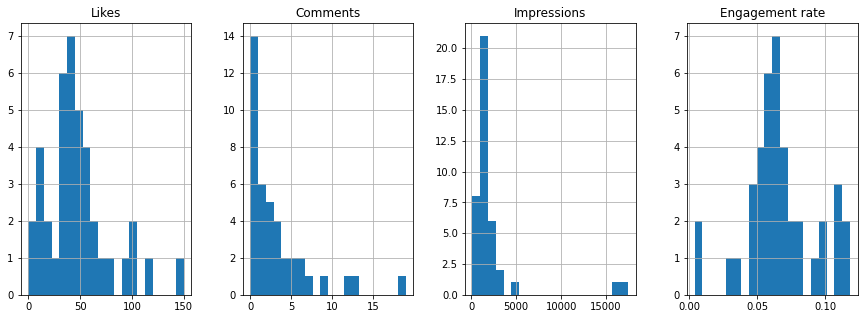

In [111]:
display(linkedin_posts_df[outcome_cols].describe(include = 'all'))
linkedin_posts_df[outcome_cols].hist(
    bins = 20,
    layout = (1,4),
    figsize = (15,5)
    )

**Results: For Likes and Comments, the minimum value is 0, indicating that some of the data points have no likes or comments. The mean and median values for Likes are relatively close, suggesting that the distribution may be approximately symmetric. However, the standard deviation is quite high, indicating that there is a lot of variability in the number of likes across the data points. The same is true for Comments. The distribution for these metrics may be skewed to the right, as there are likely some data points with very high values.**

**The distribution for Impressions may also be skewed to the right, as the maximum value is much higher than the mean and median values. The standard deviation is also quite high, indicating that there is a wide range of values for Impressions across the data points.**

**The distribution for Engagement rate is likely to be more symmetrical than the other columns, as the mean and median values are relatively close together. However, the standard deviation is still relatively high, suggesting that there is some variability in engagement rates across the data points.**



## Data Preparation - text variables

In [112]:
linkedin_posts_df.head(4)

,Post title,Post link,Post type,Campaign name,Posted by,Created date,Campaign start date,Campaign end date,Audience,Impressions,Views,Clicks,Click through rate (CTR),Likes,Comments,Reposts,Follows,Engagement rate,Content Type
0,We know firsthand that signatory management fo...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Nathan Brown,1/19/23,NaN,NaN,All followers,2297,1296.0,51,0.022203,52,0,3,NaN,0.045,Video
1,We are honored to announce that Treasury4 was ...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Jenna Breedlove,1/10/23,NaN,NaN,All followers,2981,NaN,48,0.016102,101,12,7,NaN,0.056,NaN
2,We are thrilled to announce that Treasury4 cus...,https://www.linkedin.com/feed/update/urn:li:ac...,Organic,NaN,Nathan Brown,12/22/22,NaN,NaN,All followers,1238,NaN,38,0.030695,50,0,6,NaN,0.074,NaN
3,We are thrilled to announce that Treasury4 cus...,https://www.linkedin.com/feed/update/urn:li:ac...,Sponsored,"Boost_Post_Website Visits_Dec 22, 2022, 19:06:51",Nathan Brown,12/22/22,12/22/22,1/4/23,All followers,16174,NaN,71,0.004390,4,0,0,0.0,0.004,NaN


#### Extract data features (from title)

To answer some of the posts related feature questions like what influences engagement by looking at posts text/content. 
*   No. of words
*   No. of characters
*   No. of hashtags
*   If link is present







In [267]:
text_post_df = linkedin_posts_df.copy()
text_post_df['RAW_TEXT'] = text_post_df['Post title']

In [128]:
# number of words
text_post_df['WORD_COUNT'] = text_post_df['RAW_TEXT'].apply(lambda x: len(str(x).split()))

# number of characters
text_post_df['CHAR_COUNT'] = text_post_df['RAW_TEXT'].apply(lambda x: len(str(x)))

# number of hashtags
text_post_df['HASHTAG_COUNT'] = text_post_df['RAW_TEXT'].str.count('#')

# determine if link is present
text_post_df['LINK_BOOL'] = text_post_df['RAW_TEXT'].str.contains(r'https|www|\.com|\.org|\.ai|\.io|\.co|\.gov|\.edu')

In [132]:
# review the new data features we created
data_features = ['RAW_TEXT', 'WORD_COUNT', 'CHAR_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL','Created date','Likes', 'Comments', 'Impressions','Engagement rate']
text_post_df[data_features].head(10)

,RAW_TEXT,WORD_COUNT,CHAR_COUNT,HASHTAG_COUNT,LINK_BOOL,Created date,Likes,Comments,Impressions,Engagement rate
0,We know firsthand that signatory management fo...,201,1377,5.0,False,1/19/23,52,0,2297,0.045
1,We are honored to announce that Treasury4 was ...,148,1077,7.0,True,1/10/23,101,12,2981,0.056
2,We are thrilled to announce that Treasury4 cus...,89,621,6.0,True,12/22/22,50,0,1238,0.074
3,We are thrilled to announce that Treasury4 cus...,89,621,6.0,True,12/22/22,4,0,16174,0.004
4,We are thrilled to announce that Treasury4 cus...,89,621,6.0,True,12/22/22,54,0,17412,0.009
5,"This week, we partnered with Ten Capital Wealt...",63,410,6.0,False,12/7/22,64,0,2516,0.064
6,Entity4: Your solution to successful corporate...,38,316,9.0,False,11/30/22,31,0,1145,0.045
7,NaN,1,3,NaN,NaN,11/22/22,0,0,639,0.030
8,“Best-in-class treasury departments are also c...,64,513,6.0,True,11/21/22,39,2,1373,0.066
9,Are you looking for a better way to manage you...,36,260,7.0,False,11/8/22,43,0,1385,0.051


## Analysis 
**1. overall summary statistics for Treasury4 LinkedIn posts**
* Most viewed, commented, liked, and engaged posts.
* Median post views, comments, likes, and engagemnt score.

In [135]:
outcome_cols = ['Likes', 'Comments', 'Impressions','Engagement rate']
cont_vars = ['RAW_TEXT', 'WORD_COUNT', 'CHAR_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL','Created date','Likes', 'Comments', 'Impressions','Engagement rate']

for col in outcome_cols:
    most_post = text_post_df[text_post_df[col] == max(text_post_df[col])].copy().reset_index()
    for i in list(most_post.index):
        print('\n', f'Most {col}: ({most_post[col][i]})')
        print( most_post['Post link'][i], '\n', most_post['RAW_TEXT'][i], '\n')
    display(most_post[cont_vars])


 Most Likes: (150)
https://www.linkedin.com/feed/update/urn:li:activity:6927315488360329217 
 Last week we had our entire team together in the office for our quarterly company all-hands meeting, working on our upcoming roadmap and prototyping new and innovative data-driven features. The feeling of collaboration, teamwork, and customer focus within our team is incredibly energizing! Since we've been growing, it's awesome to get to know new team members and start sharing more ideas for the path forward. We are super excited to see Treasury4 grow and help our customers with their treasury, cash, and entity management needs.
#teamculture #fintech #collaboration 



,RAW_TEXT,WORD_COUNT,CHAR_COUNT,HASHTAG_COUNT,LINK_BOOL,Created date,Likes,Comments,Impressions,Engagement rate
0,Last week we had our entire team together in t...,88,571,3.0,False,5/3/22,150,19,5103,0.113



 Most Comments: (19)
https://www.linkedin.com/feed/update/urn:li:activity:6927315488360329217 
 Last week we had our entire team together in the office for our quarterly company all-hands meeting, working on our upcoming roadmap and prototyping new and innovative data-driven features. The feeling of collaboration, teamwork, and customer focus within our team is incredibly energizing! Since we've been growing, it's awesome to get to know new team members and start sharing more ideas for the path forward. We are super excited to see Treasury4 grow and help our customers with their treasury, cash, and entity management needs.
#teamculture #fintech #collaboration 



,RAW_TEXT,WORD_COUNT,CHAR_COUNT,HASHTAG_COUNT,LINK_BOOL,Created date,Likes,Comments,Impressions,Engagement rate
0,Last week we had our entire team together in t...,88,571,3.0,False,5/3/22,150,19,5103,0.113



 Most Impressions: (17412)
https://www.linkedin.com/feed/update/urn:li:activity:7011734856749498369 
 We are thrilled to announce that Treasury4 customer NWR, Inc., has been selected by ALM Treasury & Risk as a 2023 winner of the prestigious Alexander Hamilton Awards in the category of Treasury Transformation. A leading company in their industry, NWR is constantly looking for innovative ways to deliver greater value to their customers and to manage their business more effectively. We are honored to be on this journey with them. Congratulations to all of the NWR team on this milestone achievement!

#treasury #treasurymanagement #liquiditymanagement #cashmanagement #innovation #treasurytech

https://lnkd.in/gmfVjhEj 



,RAW_TEXT,WORD_COUNT,CHAR_COUNT,HASHTAG_COUNT,LINK_BOOL,Created date,Likes,Comments,Impressions,Engagement rate
0,We are thrilled to announce that Treasury4 cus...,89,621,6.0,True,12/22/22,54,0,17412,0.009



 Most Engagement rate: (0.118)
https://www.linkedin.com/feed/update/urn:li:activity:6993622230526042112 
 Earlier this week on Halloween as part of our all-company quarterly meetings, members of our team volunteered with Second Harvest Inland Northwest to sort and pack apples to be distributed in the Spokane community. Together we packed 5,924 pounds of apples!
 
Big thank you to Second Harvest Inland Northwest for letting us work alongside you for the afternoon and thank you to our team for participating! 

#thankyou #spokane #volunteeringmatters  



,RAW_TEXT,WORD_COUNT,CHAR_COUNT,HASHTAG_COUNT,LINK_BOOL,Created date,Likes,Comments,Impressions,Engagement rate
0,Earlier this week on Halloween as part of our ...,69,448,3.0,False,11/2/22,80,3,1736,0.118


In [139]:
# Median post impressions, comments, likes, engagement score, etc.
cont_vars = ['WORD_COUNT', 'CHAR_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL','Likes', 'Comments', 'Impressions','Engagement rate']

TableOne(text_post_df, columns=cont_vars, nonnormal=cont_vars, missing=False)

Overall
n                                                          40
WORD_COUNT, median [Q1,Q3]                   53.5 [25.0,79.8]
CHAR_COUNT, median [Q1,Q3]                386.0 [193.2,545.5]
HASHTAG_COUNT, median [Q1,Q3]                   5.0 [3.0,6.8]
LINK_BOOL, median [Q1,Q3]       False               28 (73.7)
                                True                10 (26.3)
Likes, median [Q1,Q3]                        43.0 [32.5,56.2]
Comments, median [Q1,Q3]                        1.5 [0.0,4.0]
Impressions, median [Q1,Q3]            1377.5 [1120.0,1888.0]
Engagement rate, median [Q1,Q3]                 0.1 [0.1,0.1]

**Results:**
* Word count: The median word count for the posts is 53.5, with the interquartile range (IQR) between 25 and 79.8. This suggests that most posts are relatively short, with fewer words.

* Character count: The median character count for the posts is 386, with the IQR between 193.2 and 545.5. This indicates that the posts are of moderate length and contain a reasonable amount of text.

* Hashtag count: The median hashtag count for the posts is 5, with the IQR between 3 and 6.8. This suggests that hashtags are frequently used in the posts to increase their reach and visibility.

* Link presence: Out of 38 posts, 28 (73.7%) did not contain a link, while 10 (26.3%) did. This indicates that while links are not commonly used in the posts, a significant number of posts do include them.

* Likes: The median number of likes for the posts is 43, with the IQR between 32.5 and 56.2. This suggests that the posts are relatively popular and receive a reasonable amount of engagement.

* Comments: The median number of comments for the posts is 1.5, with the IQR between 0 and 4. This indicates that comments are not frequently left on the posts.

* Impressions: The median number of impressions for the posts is 1377.5, with the IQR between 1120 and 1888. This suggests that the posts have a moderate reach and are seen by a reasonable number of people.

* Engagement rate: The median engagement rate for the posts is 0.1, with the IQR between 0.1 and 0.1. This indicates that the posts have a relatively low engagement rate, with little variation among them.*

**2. Let's look at different correlations**




<AxesSubplot:>

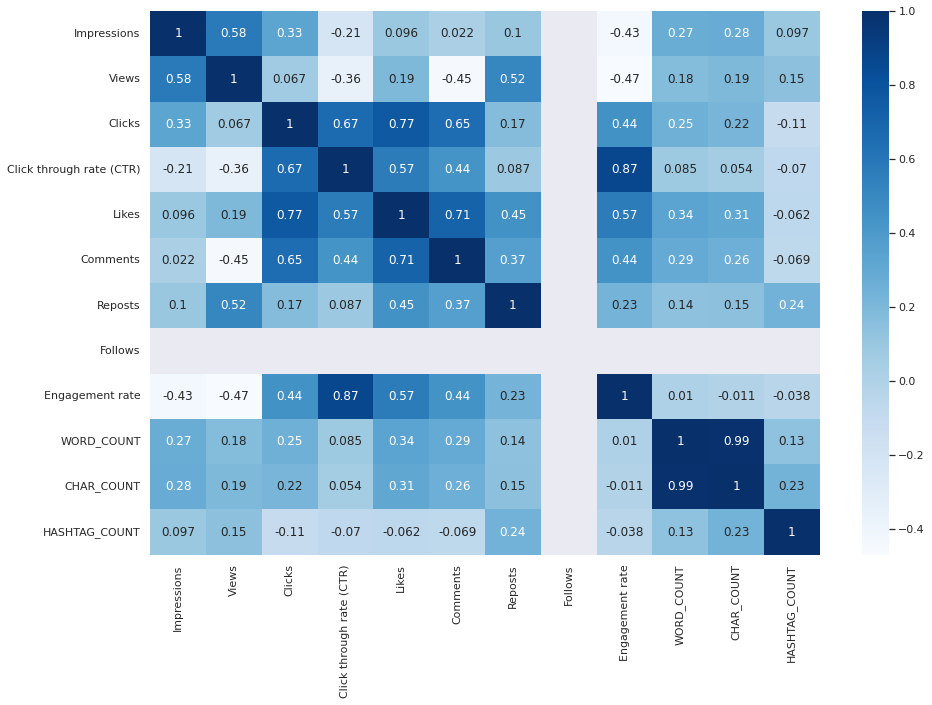

In [141]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(
    data=text_post_df.corr(),
    cmap='Blues',
    annot=True
    )

**Results: strongest correlation(s)**

*   Likes and clicks
*   Likes and comments
*   CTR and engagement rate (Ignore for now)[link text](https://)



**3. Presence of link(s) in a post**


In [143]:
cont_vars = ['WORD_COUNT', 'CHAR_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL','Likes', 'Comments', 'Impressions','Engagement rate']

TableOne(text_post_df, columns=cont_vars, nonnormal=cont_vars, groupby=['LINK_BOOL'], missing=False)

Grouped by LINK_BOOL                                                
                                                 Overall                   False                    True
n                                                     40                      28                      10
WORD_COUNT, median [Q1,Q3]              53.5 [25.0,79.8]        53.5 [25.0,75.5]        59.0 [41.0,89.0]
CHAR_COUNT, median [Q1,Q3]           386.0 [193.2,545.5]     360.5 [209.0,470.2]     470.0 [306.5,621.0]
HASHTAG_COUNT, median [Q1,Q3]              5.0 [3.0,6.8]           4.0 [3.0,6.2]           6.0 [4.5,6.8]
Likes, median [Q1,Q3]                   43.0 [32.5,56.2]        44.5 [34.5,58.8]        40.5 [35.8,53.0]
Comments, median [Q1,Q3]                   1.5 [0.0,4.0]           2.0 [0.8,5.0]           0.5 [0.0,2.0]
Impressions, median [Q1,Q3]       1377.5 [1120.0,1888.0]  1383.5 [1139.2,1888.0]  1377.5 [1269.8,2665.0]
Engagement rate, median [Q1,Q3]            0.1 [0.1,0.1]           0.1 [0.1,0.1]           0.1 [0.1,0.1]

In [166]:
link_status = text_post_df['LINK_BOOL'].unique()
outcome_variables = ['Likes', 'Comments', 'Impressions','Engagement rate']
from scipy.stats import mannwhitneyu
alpha = 0.05
U1, p = mannwhitneyu(link_status, outcome_variables, method="exact")
if (p < alpha):
        print('-> Reject null hypothesis.')
else:
    print('-> Fail to reject null hypothesis.')
    print('='*85, '\n')


-> Fail to reject null hypothesis.



**Results:**
* posts with link had a slightly higher median number of likes (44.5, Q1=34.5, Q3=58.8) than posts without link (40.5, Q1=35.8, Q3=53.0).

* posts with link had a higher median number of comments (2.0, Q1=0.8, Q3=5.0) than posts without link (0.5, Q1=0.0, Q3=2.0).

* There was no significant difference in both posts.

* There was no significant difference in engagement rate between both the posts.

**4. Main drivers of engagement in a post**

Use of random forest:
Random forests are one of the most versatile models in machine learning! Beyond being able to handle non-normal data very well, you can also use the model to quickly understand feature importance. Though there are not that many drivers for this question, when we move onto vectorized hashtags and content in the next questions, this will become extremely useful. Specifically, it will help us zone in on the most important words-- out of hundreds-- to focus further analytics on.



In [181]:
# I found that there are two NaN values in columns 'HASHTAG_COUNT', 'LINK_BOOL', need to drop them for model to work
text_post_df = text_post_df.dropna(subset=['HASHTAG_COUNT', 'LINK_BOOL'])

In [182]:
# 1. Fit a random forest model where the independent variable is the selected outcome
#    variable and the dependent variables are Number of Words, Number of Characters,
#    Number of Emojis, and Number of Hashtags.
# 2. Extract feature importance
drivers = ['WORD_COUNT', 'CHAR_COUNT', 'HASHTAG_COUNT', 'LINK_BOOL']
outcome_variables = ['Likes', 'Comments', 'Impressions','Engagement rate']

for var in outcome_variables:
    # data
    X = text_post_df[drivers].copy()
    y = text_post_df[var].copy()

    # fit model
    random_forest = RandomForestRegressor()
    random_forest.fit(X, y)

    # feature importance
    feature_importance = pd \
        .DataFrame({'feature':X.columns, 'importance':random_forest.feature_importances_}) \
        .sort_values(by='importance', ascending=False) \
        .reset_index(drop=True)

    print(f'{var}:')
    display(feature_importance.head())

Likes:


,feature,importance
0,CHAR_COUNT,0.408056
1,WORD_COUNT,0.407517
2,HASHTAG_COUNT,0.157079
3,LINK_BOOL,0.027348


Comments:


,feature,importance
0,CHAR_COUNT,0.395197
1,WORD_COUNT,0.379816
2,HASHTAG_COUNT,0.181009
3,LINK_BOOL,0.043978


Impressions:


,feature,importance
0,CHAR_COUNT,0.543369
1,WORD_COUNT,0.351205
2,LINK_BOOL,0.075508
3,HASHTAG_COUNT,0.029918


Engagement rate:


,feature,importance
0,CHAR_COUNT,0.490628
1,WORD_COUNT,0.285044
2,HASHTAG_COUNT,0.165277
3,LINK_BOOL,0.059051


**Results:** Character count influces engagement than any other variable. Second important factor is hashtag count, generally more hashtags is correlated to more engagement.

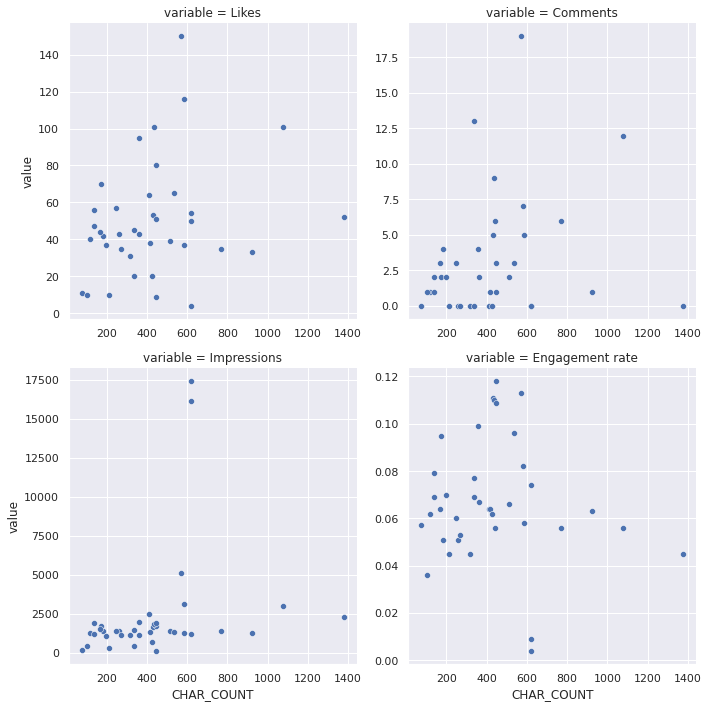

In [183]:
# 3. Plot most important feature (CHAR_COUNT) to outcome variable
outcome_variables = ['Likes', 'Comments', 'Impressions','Engagement rate']
char_plot_df = text_post_df.melt(id_vars=['CHAR_COUNT'], value_vars=outcome_variables)

sns.relplot(
    data=char_plot_df,
    x='CHAR_COUNT',
    y='value',
    col='variable',
    col_wrap=2,
    kind='scatter',
    facet_kws={'sharey':False, 'sharex':False}
)

**5. Special hashtages driving engagement in a post**


In [ ]:
# create a df for all hastags in the posts
hashtag_df = text_post_df['RAW_TEXT'].str.findall(r'(#\S*)')
hashtag_df = hashtag_df.dropna()
hashtag_df = hashtag_df.apply(lambda x: ' '.join(x))

In [262]:
# copy hashtags data
hashtags_df = hashtag_df.copy()

# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(hashtags_df)

# vector to dataframe
hashtags_tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out() )

# merging back to original data
hashtags_final_df = pd.concat([hashtags_df, hashtags_tfidf_df], axis=1)

In [292]:
# dimensions must match for the model to work
hashtags_final_df = hashtags_final_df.dropna()
text_post_df = text_post_df.dropna(subset=['Post title'])
text_post_df = text_post_df.iloc[:-2]

In [297]:
# 1. Fit a random forest model where the independent variable is the selected outcome variable
#    and the dependent variables arethe TF-IDF Vectorizer hashtags.
# 2. Extract feature importance.
outcome_variables = ['Likes', 'Comments', 'Impressions','Engagement rate']
for var in outcome_variables:
    # data
    X = hashtags_final_df \
        .copy() \
        .drop(['RAW_TEXT'], axis=1)
    y = text_post_df[var].copy()

    # fit model
    random_forest = RandomForestRegressor()
    random_forest.fit(X, y)

    # feature importance
    feature_importance = pd \
        .DataFrame({'feature':X.columns, 'importance':random_forest.feature_importances_}) \
        .sort_values(by='importance', ascending=False) \
        .reset_index(drop=True)
    
    print(f'{var}:')
    display(feature_importance.head(10))

Likes:


,feature,importance
0,implementation,0.114342
1,fintech,0.090263
2,thankyou,0.087939
3,cybersecurity,0.043388
4,cybersecurityawareness,0.042311
5,bestcompaniestoworkfor2022,0.041640
6,experiencesthatmatter,0.041353
7,kyc,0.040373
8,treasury,0.039515
9,career,0.037980


Comments:


,feature,importance
0,fintech,0.165403
1,collaboration,0.092798
2,teamculture,0.092239
3,bestcompaniestoworkfor2022,0.078660
4,bestcompaniesinwashington,0.067003
5,futureleaders,0.063109
6,futuregeneration,0.056423
7,cybersecurityawareness,0.047596
8,cybersecurity,0.041312
9,communityinvolvement,0.038378


Impressions:


,feature,importance
0,innovation,0.225641
1,treasurytech,0.199722
2,cashmanagement,0.199075
3,liquiditymanagement,0.135046
4,cybersecurity,0.043957
5,futuregeneration,0.023059
6,implementation,0.018143
7,treasurymanagement,0.015474
8,futureleaders,0.015140
9,experiencesthatmatter,0.013010


Engagement rate:


,feature,importance
0,innovation,0.139640
1,cashmanagement,0.060683
2,spokane,0.059473
3,afp2022,0.058678
4,treasurytech,0.049334
5,thankyou,0.047594
6,liquiditymanagement,0.047156
7,treasury,0.045048
8,afp,0.042403
9,taxtechnology,0.040182


In [307]:
# 3. For the most important features (innovation and fintech), assign status of whether or not feature is present for each post.
outcome_variables = ['Likes', 'Comments', 'Impressions','Engagement rate']
analytics_hashtag_df = text_post_df.copy()
analytics_hashtag_df['ANALYTICS_STATUS'] = hashtags_final_df['RAW_TEXT'].str.contains('fintech','innovation','implementation', regex=False)

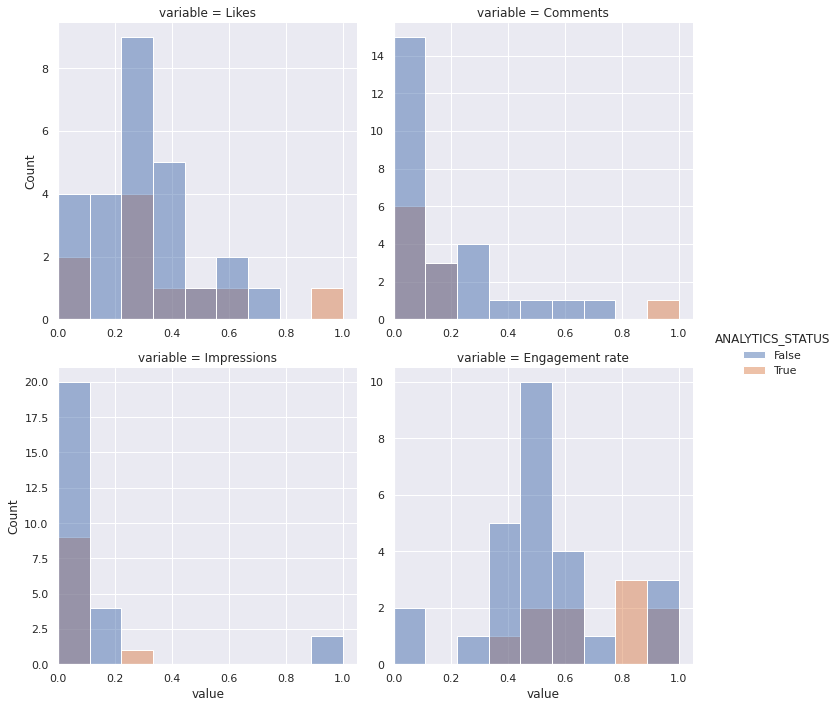

In [308]:
# 5. Plot the distributions of the outcome variables (normalizing values only for plots).
scaler = MinMaxScaler()
analytics_hashtag_plot_df = analytics_hashtag_df.copy()
analytics_hashtag_plot_df[outcome_variables] = scaler.fit_transform(analytics_hashtag_plot_df[outcome_variables])
analytics_hashtag_plot_df = analytics_hashtag_plot_df.melt(id_vars=['ANALYTICS_STATUS'], value_vars=outcome_variables)

hashtag_plot = sns.displot(
    data=analytics_hashtag_plot_df,
    x='value',
    col='variable',
    hue='ANALYTICS_STATUS',
    col_wrap=2,
    kind='hist',
    fill=True,
    facet_kws={'sharey':False, 'sharex':False}
)
hashtag_plot.set(xlim=(0, None))

In [311]:
# content text data
text_post_df['CONTENT'] = text_post_df['RAW_TEXT'].str.replace(r'(#\S*)', '', regex=True)

<ipython-input-311-1ddc8553e6fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_post_df['CONTENT'] = text_post_df['RAW_TEXT'].str.replace(r'(#\S*)', '', regex=True)


In [313]:
# loading nlp model
nlp = spacy.load('en_core_web_sm')
comments_df = text_post_df[['CONTENT']].copy()
comments_df['CONTENT_TOKENS'] = comments_df['CONTENT'].apply(lambda x: nlp(x))

In [315]:
comments_df['CONTENT_PREPROCESSED'] = comments_df['CONTENT_TOKENS'].apply(
    lambda doc: [token.lemma_ for token in doc if token.is_stop == False]
    )

In [316]:
# converting CONTENT_PREPROCESSED from list to string
# if statement to prevent join multiple times to same data
if isinstance(comments_df['CONTENT_PREPROCESSED'][0], list):
    comments_df['CONTENT_PREPROCESSED'] = comments_df['CONTENT_PREPROCESSED'].apply(lambda x: ' '.join(x))
    comments_df['CONTENT_PREPROCESSED'] = comments_df['CONTENT_PREPROCESSED'].str.strip()
    
else:
    print('Already converted to string.')

In [318]:
# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(comments_df['CONTENT_PREPROCESSED'])

# vector to dataframe
content_tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

# merging back to original data
content_final_df = pd.concat([comments_df, content_tfidf_df], axis=1)

In [325]:
# 1. Fit a random forest model where the independent variable is the selected outcome
#    variable and the dependent variables are the TF-IDF Vectorizer content.
# 2. Extract feature importance.
content_final_df = content_final_df.dropna()
text_post_df = text_post_df.iloc[:-2]
outcome_variables = ['Likes', 'Comments', 'Impressions','Engagement rate']
for var in outcome_variables:
    # data
    X = content_final_df \
        .copy() \
        .drop(['CONTENT', 'CONTENT_TOKENS', 'CONTENT_PREPROCESSED'], axis=1)
    y = text_post_df[var].copy()

    # fit model
    random_forest = RandomForestRegressor()
    random_forest.fit(X, y)

    # feature importance
    feature_importance = pd \
        .DataFrame({'feature':X.columns, 'importance':random_forest.feature_importances_}) \
        .sort_values(by='importance', ascending=False) \
        .reset_index(drop=True) \
        .head(10)
    
    print(f'{var}:')
    display(feature_importance.head(10))

Likes:


,feature,importance
0,data,0.084224
1,treasury4,0.071355
2,speak,0.055019
3,https,0.041854
4,thekkenmar,0.036025
5,financial,0.034646
6,suresh,0.028109
7,live,0.021046
8,thank,0.019209
9,continue,0.018122


Comments:


,feature,importance
0,importance,0.230567
1,workplace,0.099117
2,check,0.047423
3,speak,0.042026
4,treasury4,0.034464
5,article,0.032644
6,company,0.021948
7,write,0.021521
8,burns,0.018719
9,technology,0.016800


Impressions:


,feature,importance
0,constantly,0.167277
1,deliver,0.055118
2,achievement,0.053072
3,value,0.037727
4,effectively,0.037097
5,alexander,0.036986
6,industry,0.029263
7,hamilton,0.028631
8,transformation,0.028516
9,thrill,0.028178


Engagement rate:


,feature,importance
0,journey,0.124339
1,treasury4,0.107854
2,big,0.085610
3,company,0.053369
4,brown,0.034160
5,business,0.031339
6,risk,0.028945
7,northwest,0.024547
8,work,0.023222
9,solution,0.021088
